## <font color='blue'>Telecom Churn Prediction_Time Series Forecasting</font>

Agenda: Telecom companies have strong business requirement to reduce customer churn, predict customers at high risk of churn, and retain high profitable customers.

The telecom business defines churn to be of two types:
Revenue-Based Churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time.
Usage-Based Churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

__Business Objective__: Building a predictive model using the usage-based definition.The model shall predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

The objective of the analysis is to build two models— 
1. A predictive model to forecast customer churn, and
2. A classification model to identify important predictor attributes that provide reasoning for the churn.  

## <font color='blue'>Approach</font>

1. The data provided comprises of customer usage and revenue generated details for 4 months (Jun-Sep).
2. The model must filter high-value customers and predict if the high-value customer would churn.
3. The model shall be able to identify variables that are strong predictors of churn.
4. The model shall tag churners based on the following attributes:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

### The group case study is a combined effort of:
__Suchitra Gupta,__  
__Sushma Vemuri &__  
__Utkarsh Tole__

## <font color='blue'>ANALYSIS PART 1: Data Preprocessing</font>

### <font color=blue>1.1—Importing required libraries and data inspection</font>

In [ ]:
import os.path
import pandas as pd
import numpy as np
import csv
import os, glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk

import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
pd.options.display.max_columns = None
pd.options.display.max_seq_items = 500
pd.options.display.max_rows = 500

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# Import csv file
df = pd.read_csv(r"C:\Users\ashek\OneDrive\Desktop\IIITB-upGrad\TelecomChurn\df.csv",sep=',')

#Defnining column 'mobile_number' as the index
df.set_index('mobile_number',inplace=True)
df.head(10)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,

In [3]:
#Creating a backup of the orginial dataset
df_copy=df.copy()

In [4]:
#Dimensional statistics of dataframe
#cat_basedf=basedf.select_dtypes(exclude=['int64','float64']).columns
df.shape

(99999, 225)

In [5]:
df.dtypes

circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               

### <font color=blue>1.2— Missing Value Treament</font>

#### Some columns have single value counts. Such columns can be dropped

In [6]:
df[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
             'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
             'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']].apply(pd.Series.value_counts)          

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0.0,NaN,98981.0,98981.0,98981.0,NaN,NaN,NaN,96062.0,96140.0,94621.0,96062.0,96140.0,94621.0
109.0,99999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/30/2014,NaN,NaN,NaN,NaN,99999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7/31/2014,NaN,NaN,NaN,NaN,NaN,99398.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,98899.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
             'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
             'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1 , inplace = True)

In [8]:
#Identifying columns with > 50% missing values except ones to be used to identify high-value customers
(round(100*(df.isnull().sum()/len(df.index)),2)).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
av_rech_amt_data_6          74.85
arpu_3g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
count_rech_2g_6             74.85
arpu_3g_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
max_rech_data_7             74.43
date_of_last_rech_data_7    74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
fb_user_7                   74.43
night_pck_user_9            74.08
max_rech_data_9             74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
date_of_last_r

In [9]:
#Further dropping more columns with >50% missing values.
#Columns like av_rech_amt_data_ & total_rech_data_ are to be used to compute high value customers.
#Hence these columns shall not be dropped.
df=df.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                    'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
                    'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                    'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                    'fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                    'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                   'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],1)

In [10]:
#Verifying remiaining columns with > 50% missing values except ones to be used to identify high-value customers
(round(100*(df.isnull().sum()/len(df.index)),2)).sort_values(ascending=False)

av_rech_amt_data_6      74.85
max_rech_data_6         74.85
total_rech_data_6       74.85
av_rech_amt_data_7      74.43
max_rech_data_7         74.43
total_rech_data_7       74.43
av_rech_amt_data_9      74.08
max_rech_data_9         74.08
total_rech_data_9       74.08
av_rech_amt_data_8      73.66
max_rech_data_8         73.66
total_rech_data_8       73.66
loc_og_t2f_mou_9         7.75
og_others_9              7.75
loc_og_t2c_mou_9         7.75
loc_og_mou_9             7.75
std_og_mou_9             7.75
std_og_t2m_mou_9         7.75
ic_others_9              7.75
isd_ic_mou_9             7.75
spl_ic_mou_9             7.75
std_og_t2f_mou_9         7.75
std_ic_mou_9             7.75
loc_ic_t2t_mou_9         7.75
std_ic_t2o_mou_9         7.75
std_ic_t2f_mou_9         7.75
std_ic_t2m_mou_9         7.75
std_ic_t2t_mou_9         7.75
std_og_t2c_mou_9         7.75
loc_ic_mou_9             7.75
loc_ic_t2f_mou_9         7.75
std_og_t2t_mou_9         7.75
loc_ic_t2m_mou_9         7.75
roam_ic_mo

In [11]:
df.shape

(99999, 184)

## <font color='blue'>ANALYSIS PART 2: Filter high-value customers</font>

### <font color=blue>2.1— Idenitfying High-Value Customers (based on the months of June & July)</font>

__Following columns to be used for computation:  
total_rech_data_6  
total_rech_data_7  
av_rech_amt_data_6  
av_rech_amt_data_7  
total_rech_amt_6  
total_rech_amt_7__

In [12]:
# Imputing all recharge related columns with zeroes as these are to be used to compute cutoff value for high-value customers
df.total_rech_data_6.fillna(value=0,inplace=True)
df.total_rech_data_7.fillna(value=0,inplace=True)
df.total_rech_data_8.fillna(value=0,inplace=True)
df.total_rech_data_9.fillna(value=0,inplace=True)

df.av_rech_amt_data_6.fillna(value=0,inplace=True)
df.av_rech_amt_data_7.fillna(value=0,inplace=True)
df.av_rech_amt_data_8.fillna(value=0,inplace=True)
df.av_rech_amt_data_9.fillna(value=0,inplace=True)

df.max_rech_data_6.fillna(value=0,inplace=True)
df.max_rech_data_7.fillna(value=0,inplace=True)
df.max_rech_data_8.fillna(value=0,inplace=True)
df.max_rech_data_9.fillna(value=0,inplace=True)

#### 2.1.1—Product total of data recharge = MB of data recharge * average amount of data recharge

In [13]:
df['total_data_rechg_amt_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rechg_amt_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

#### 2.1.2— Sum total of data + voice recharge

In [14]:
df['sum_alltype_rechg_6']=df.total_rech_amt_6 + df.total_data_rechg_amt_6
df['sum_alltype_rechg_7']=df.total_rech_amt_7 + df.total_data_rechg_amt_7

#### 2.1.3— Average amount of recharge for calltime and data

In [15]:
df['avg_all_rechg_amt']=(df.sum_alltype_rechg_6+df.sum_alltype_rechg_7)/2.0

#### 2.1.4— Computing values in 70th percentile of average recharge amount for voice+data charges

In [16]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

df_churn = df.loc[df.avg_all_rechg_amt >= df.avg_all_rechg_amt.quantile(0.7), :]

df_churn = df_churn.reset_index(drop=True)
df_churn.shape

(30001, 189)

In [17]:
#Dropping the derived columns used to compute high value churn customers
df_churn=df_churn.drop(['total_data_rechg_amt_6','total_data_rechg_amt_7','sum_alltype_rechg_6','sum_alltype_rechg_7','avg_all_rechg_amt'],1)
df_churn.shape

(30001, 184)

### <font color=blue>2.1.5— Tagging Customers with churn tag _(churn=1, else 0)_

In [18]:
tag_churners=df_churn['total_ic_mou_9']+df_churn['total_og_mou_9']+df_churn['vol_2g_mb_9']+df_churn['vol_3g_mb_9']
df_churn['Churn'] = np.where(tag_churners,0,1)
df_churn.shape # before dropping the columns for the 9th month

(30001, 185)

In [19]:
# Dropping all attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
for col in df_churn.columns:
    if '_9' in col:
        del df_churn[col]

In [20]:
#Checking Churn Ratio
(df_churn['Churn'].value_counts() / df_churn['Churn'].count())*100

0    91.863605
1     8.136395
Name: Churn, dtype: float64

In [21]:
df_churn.shape

(30001, 138)

## <font color='blue'>ANALYSIS PART 3: Data Transformation</font>

### <font color=blue>3.1— Converting date column into a derived feature</font>

df_churn['date_of_last_rech_6']=pd.to_datetime(df_churn['date_of_last_rech_6']).dt.day
df_churn['date_of_last_rech_7']=pd.to_datetime(df_churn['date_of_last_rech_7']).dt.day
df_churn['date_of_last_rech_8']=pd.to_datetime(df_churn['date_of_last_rech_8']).dt.day
#df_churn['date_of_last_rech_9']=pd.to_datetime(df_churn['date_of_last_rech_9']).dt.day
#df_churn['last_date_of_month_9']=pd.to_datetime(df_churn['last_date_of_month_9']).dt.day

In [22]:
# convert date columns to datetime format
date_col = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
df_churn[date_col].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/21/2014,7/16/2014,8/8/2014
1,6/27/2014,7/25/2014,8/26/2014
2,6/25/2014,7/31/2014,8/30/2014
3,6/30/2014,7/31/2014,8/31/2014
4,6/18/2014,7/7/2014,8/24/2014


In [23]:
for col in date_col:
    df_churn[col] = pd.to_datetime(df_churn[col])

print(df_churn[date_col].info())
df_churn[date_col].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  29928 non-null  datetime64[ns]
 1   date_of_last_rech_7  29903 non-null  datetime64[ns]
 2   date_of_last_rech_8  29418 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 703.3 KB
None


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-21,2014-07-16,2014-08-08
1,2014-06-27,2014-07-25,2014-08-26
2,2014-06-25,2014-07-31,2014-08-30
3,2014-06-30,2014-07-31,2014-08-31
4,2014-06-18,2014-07-07,2014-08-24


In [24]:
# Defining last day of each month in the data
eod_6=datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
eod_7=datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
eod_8=datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

In [25]:
#Computing difference between last day of the month and the monthly recharge date
df_churn['days_left_mnthly_exp_6']=(eod_6-df_churn.date_of_last_rech_6).astype('timedelta64[D]')
df_churn['days_left_mnthly_exp_7']=(eod_7-df_churn.date_of_last_rech_7).astype('timedelta64[D]')
df_churn['days_left_mnthly_exp_8']=(eod_8-df_churn.date_of_last_rech_8).astype('timedelta64[D]')
df_churn.shape

(30001, 141)

In [26]:
#Dropping original date columns
df_churn=df_churn.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],1)
df_churn.shape

(30001, 138)

### <font color='blue'>3.2—Creating Dummy Variables</font>

In [27]:
#Binning column variable 'AON'
df_churn['AON_slabs']=pd.cut(df_churn.aon,[180,365,730,1095,1460,2190,2920,4500],labels=['AON_6m-1yr','AON_1-2yr','AON_2-3yr','AON_3-4yr','AON_4-6yr','AON_6-8yr','AON_>8yr'])

In [28]:
#Creating dummy features for categorical variable AON_slabs
aon_dummy=pd.get_dummies(df_churn['AON_slabs'],drop_first=True)
df_churn=pd.concat([df_churn,aon_dummy],axis=1)

#Dropping the original column 'aon' and the categorical column 'AON_slabs' so created
df_churn=df_churn.drop(['AON_slabs','aon'],1)
df_churn.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,days_left_mnthly_exp_6,days_left_mnthly_exp_7,days_left_mnthly_exp_8,AON_1-2yr,AON_2-3yr,AON_3-4yr,AON_4-6yr,AON_6-8yr,AON_>8yr
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,3.58,1,9.0,15.0,23.0,0,1,0,0,0,0
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.00,1,3.0,6.0,5.0,0,1,0,0,0,0
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.

In [29]:
#Verifying columns with missing values
(round(100*(df.isnull().sum()/len(df.index)),2)).sort_values(ascending=False)
(round(100*(df_churn.isnull().sum()/len(df_churn.index)),2)).sort_values(ascending=False)

std_ic_mou_9              7.75
ic_others_9               7.75
loc_og_t2f_mou_9          7.75
loc_og_t2c_mou_9          7.75
spl_ic_mou_9              7.75
spl_og_mou_9              7.75
loc_og_t2m_mou_9          7.75
og_others_9               7.75
std_og_t2m_mou_9          7.75
loc_og_t2t_mou_9          7.75
isd_og_mou_9              7.75
std_ic_t2o_mou_9          7.75
std_ic_t2f_mou_9          7.75
roam_og_mou_9             7.75
loc_og_mou_9              7.75
std_ic_t2m_mou_9          7.75
roam_ic_mou_9             7.75
std_ic_t2t_mou_9          7.75
std_og_mou_9              7.75
loc_ic_mou_9              7.75
offnet_mou_9              7.75
std_og_t2c_mou_9          7.75
loc_ic_t2f_mou_9          7.75
std_og_t2t_mou_9          7.75
onnet_mou_9               7.75
loc_ic_t2m_mou_9          7.75
std_og_t2f_mou_9          7.75
loc_ic_t2t_mou_9          7.75
isd_ic_mou_9              7.75
isd_og_mou_8              5.38
spl_og_mou_8              5.38
std_og_mou_8              5.38
ic_other

std_ic_t2m_mou_8          3.91
loc_og_t2c_mou_8          3.91
std_og_t2f_mou_8          3.91
og_others_8               3.91
loc_og_t2m_mou_8          3.91
spl_ic_mou_8              3.91
loc_og_t2f_mou_8          3.91
isd_ic_mou_8              3.91
ic_others_8               3.91
roam_og_mou_8             3.91
loc_og_mou_8              3.91
spl_og_mou_8              3.91
std_og_t2t_mou_8          3.91
isd_og_mou_8              3.91
std_og_t2m_mou_8          3.91
std_og_mou_8              3.91
std_ic_mou_8              3.91
loc_og_t2t_mou_8          3.91
std_ic_t2f_mou_8          3.91
offnet_mou_8              3.91
loc_ic_t2t_mou_8          3.91
loc_ic_t2m_mou_8          3.91
loc_ic_t2f_mou_8          3.91
loc_ic_mou_8              3.91
onnet_mou_8               3.91
std_ic_t2t_mou_8          3.91
roam_ic_mou_8             3.91
days_left_mnthly_exp_8    1.94
std_ic_t2f_mou_6          1.82
loc_ic_t2m_mou_6          1.82
isd_og_mou_6              1.82
loc_ic_t2f_mou_6          1.82
spl_og_m

### <font color='blue'>3.3—Deriving new features</font>

In [30]:
# Summation of calltime __in-network & out-of-network__ 
df_churn['total_allntwrk_calltime_6']=df_churn['onnet_mou_6']+df_churn['offnet_mou_6']
df_churn['total_allntwrk_calltime_7']=df_churn['onnet_mou_7']+df_churn['offnet_mou_7']
df_churn['total_allntwrk_calltime_8']=df_churn['onnet_mou_8']+df_churn['offnet_mou_8']

#Summation of calltime for __local outgoing__ calls
df_churn['total_loc_og_calltime_6']=df_churn['loc_og_t2t_mou_6']+df_churn['loc_og_t2m_mou_6']+df_churn['loc_og_t2f_mou_6']+df_churn['loc_og_t2c_mou_6']+df_churn['loc_og_mou_6']
df_churn['total_loc_og_calltime_7']=df_churn['loc_og_t2t_mou_7']+df_churn['loc_og_t2m_mou_7']+df_churn['loc_og_t2f_mou_7']+df_churn['loc_og_t2c_mou_7']+df_churn['loc_og_mou_7']
df_churn['total_loc_og_calltime_8']=df_churn['loc_og_t2t_mou_8']+df_churn['loc_og_t2m_mou_8']+df_churn['loc_og_t2f_mou_8']+df_churn['loc_og_t2c_mou_8']+df_churn['loc_og_mou_8']

#Summation of calltime for __std,isd,roaming,special & other outgoing__ calls
df_churn['total_nonlocal_og_calltime_6']=df_churn['roam_og_mou_6']+df_churn['std_og_t2t_mou_6']+df_churn['std_og_t2m_mou_6']+df_churn['std_og_t2f_mou_6']+df_churn['std_og_mou_6']+df_churn['isd_og_mou_6']+df_churn['spl_og_mou_6']+df_churn['og_others_6']
df_churn['total_nonlocal_og_calltime_7']=df_churn['roam_og_mou_7']+df_churn['std_og_t2t_mou_7']+df_churn['std_og_t2m_mou_7']+df_churn['std_og_t2f_mou_7']+df_churn['std_og_mou_7']+df_churn['isd_og_mou_7']+df_churn['spl_og_mou_7']+df_churn['og_others_7']
df_churn['total_nonlocal_og_calltime_8']=df_churn['roam_og_mou_8']+df_churn['std_og_t2t_mou_8']+df_churn['std_og_t2m_mou_8']+df_churn['std_og_t2f_mou_8']+df_churn['std_og_mou_8']+df_churn['isd_og_mou_8']+df_churn['spl_og_mou_8']+df_churn['og_others_8']

#Summation of calltime for __local incoming__ calls
df_churn['total_loc_ic_calltime_6']=df_churn['loc_ic_t2t_mou_6']+df_churn['loc_ic_t2m_mou_6']+df_churn['loc_ic_t2f_mou_6']+df_churn['loc_ic_mou_6']
df_churn['total_loc_ic_calltime_7']=df_churn['loc_ic_t2t_mou_7']+df_churn['loc_ic_t2m_mou_7']+df_churn['loc_ic_t2f_mou_7']+df_churn['loc_ic_mou_7']
df_churn['total_loc_ic_calltime_8']=df_churn['loc_ic_t2t_mou_8']+df_churn['loc_ic_t2m_mou_8']+df_churn['loc_ic_t2f_mou_8']+df_churn['loc_ic_mou_8']

#Summation of calltime for __std,isd,roaming,special, & other _incoming__ calls
df_churn['total_nonlocal_ic_calltime_6']=df_churn['roam_ic_mou_6']+df_churn['std_ic_t2t_mou_6']+df_churn['std_ic_t2m_mou_6']+df_churn['std_ic_t2f_mou_6']+df_churn['std_ic_mou_6']+df_churn['spl_ic_mou_6']+df_churn['isd_ic_mou_6']+df_churn['ic_others_6']
df_churn['total_nonlocal_ic_calltime_7']=df_churn['roam_ic_mou_7']+df_churn['std_ic_t2t_mou_7']+df_churn['std_ic_t2m_mou_7']+df_churn['std_ic_t2f_mou_7']+df_churn['std_ic_mou_7']+df_churn['spl_ic_mou_7']+df_churn['isd_ic_mou_7']+df_churn['ic_others_7']
df_churn['total_nonlocal_ic_calltime_8']=df_churn['roam_ic_mou_8']+df_churn['std_ic_t2t_mou_8']+df_churn['std_ic_t2m_mou_8']+df_churn['std_ic_t2f_mou_8']+df_churn['std_ic_mou_8']+df_churn['spl_ic_mou_8']+df_churn['isd_ic_mou_8']+df_churn['ic_others_8']

# Sum total of 2g and 3g data usage per month
df_churn['total_datausage_6']=df_churn['vol_2g_mb_6']+df_churn['vol_3g_mb_6']
df_churn['total_datausage_7']=df_churn['vol_2g_mb_7']+df_churn['vol_3g_mb_7']
df_churn['total_datausage_8']=df_churn['vol_2g_mb_8']+df_churn['vol_3g_mb_8']

# Sum total of 2g service schemes availed
df_churn['2gservschemes_count_6']=df_churn['monthly_2g_6']+df_churn['sachet_2g_6']
df_churn['2gservschemes_count_7']=df_churn['monthly_2g_7']+df_churn['sachet_2g_7']
df_churn['2gservschemes_count_8']=df_churn['monthly_2g_8']+df_churn['sachet_2g_8']

# Sum total of 3g service schemes availed
df_churn['3gservschemes_count_6']=df_churn['monthly_3g_6']+df_churn['sachet_3g_6']
df_churn['3gservschemes_count_7']=df_churn['monthly_3g_7']+df_churn['sachet_3g_7']
df_churn['3gservschemes_count_8']=df_churn['monthly_3g_8']+df_churn['sachet_3g_8']

In [31]:
#Dropping original columns
df_churn=df_churn.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8',
                   'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
                    'loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6',
                    'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','roam_og_mou_6',
                    'roam_og_mou_7','roam_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
                   'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7',
                    'std_og_t2f_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7',
                    'isd_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7',
                    'spl_og_mou_8','og_others_6','og_others_7','og_others_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7',
                    'loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6',
                    'loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','roam_ic_mou_6',
                    'roam_ic_mou_7','roam_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7',
                    'std_ic_t2f_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7',
                    'spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8',
                   'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6',
                    'monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6',
                    'monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8'],1)

df_churn.shape

(30001, 68)

In [32]:
# Sum total of data recharge
df_churn['datarechg_totalamt_6']=df_churn['total_rech_data_6']*df_churn['av_rech_amt_data_6']
df_churn['datarechg_totalamt_7']=df_churn['total_rech_data_7']*df_churn['av_rech_amt_data_7']
df_churn['datarechg_totalamt_8']=df_churn['total_rech_data_8']*df_churn['av_rech_amt_data_8']
#Keeping the avg. data recharge amount as it might be helpful for further analysis 

#Sumtotal of amount for voicecall and data usage
df_churn['voice_data_totalamt_6']=df_churn['total_rech_amt_6']+df_churn['datarechg_totalamt_6']
df_churn['voice_data_totalamt_7']=df_churn['total_rech_amt_7']+df_churn['datarechg_totalamt_7']
df_churn['voice_data_totalamt_8']=df_churn['total_rech_amt_8']+df_churn['datarechg_totalamt_8']
df_churn.shape

(30001, 74)

In [33]:
#Verifying null values for all columns pre-imputation
(round(100*(df_churn.isnull().sum()/len(df_churn.index)),2).sort_values(ascending=False)).head(20)

total_allntwrk_calltime_8       3.91
total_loc_og_calltime_8         3.91
total_nonlocal_og_calltime_8    3.91
total_loc_ic_calltime_8         3.91
total_nonlocal_ic_calltime_8    3.91
days_left_mnthly_exp_8          1.94
total_allntwrk_calltime_6       1.82
total_loc_og_calltime_6         1.82
total_nonlocal_og_calltime_6    1.82
total_loc_ic_calltime_6         1.82
total_nonlocal_ic_calltime_6    1.82
total_nonlocal_og_calltime_7    1.79
total_nonlocal_ic_calltime_7    1.79
total_allntwrk_calltime_7       1.79
total_loc_og_calltime_7         1.79
total_loc_ic_calltime_7         1.79
days_left_mnthly_exp_7          0.33
days_left_mnthly_exp_6          0.24
total_rech_amt_7                0.00
total_rech_amt_6                0.00
dtype: float64

In [34]:
#Imputing missing values for derived date columns with their respective medians
df_churn.loc[np.isnan(df_churn['total_loc_ic_calltime_8']), ['total_loc_ic_calltime_8']] = df_churn['total_loc_ic_calltime_8'].median()
df_churn.loc[np.isnan(df_churn['total_nonlocal_ic_calltime_8']), ['total_nonlocal_ic_calltime_8']] = df_churn['total_nonlocal_ic_calltime_8'].median()
df_churn.loc[np.isnan(df_churn['total_nonlocal_og_calltime_8']), ['total_nonlocal_og_calltime_8']] = df_churn['total_nonlocal_og_calltime_8'].median()
df_churn.loc[np.isnan(df_churn['total_loc_og_calltime_8']), ['total_loc_og_calltime_8']] = df_churn['total_loc_og_calltime_8'].median()
df_churn.loc[np.isnan(df_churn['total_allntwrk_calltime_8']), ['total_allntwrk_calltime_8']] = df_churn['total_allntwrk_calltime_8'].median()
df_churn.loc[np.isnan(df_churn['total_loc_og_calltime_6']), ['total_loc_og_calltime_6']] = df_churn['total_loc_og_calltime_6'].median()
df_churn.loc[np.isnan(df_churn['total_loc_ic_calltime_6']), ['total_loc_ic_calltime_6']] = df_churn['total_loc_ic_calltime_6'].median()
df_churn.loc[np.isnan(df_churn['total_nonlocal_og_calltime_6']), ['total_nonlocal_og_calltime_6']] = df_churn['total_nonlocal_og_calltime_6'].median()
df_churn.loc[np.isnan(df_churn['total_allntwrk_calltime_6']), ['total_allntwrk_calltime_6']] = df_churn['total_allntwrk_calltime_6'].median()
df_churn.loc[np.isnan(df_churn['total_nonlocal_ic_calltime_6']), ['total_nonlocal_ic_calltime_6']] = df_churn['total_nonlocal_ic_calltime_6'].median()
df_churn.loc[np.isnan(df_churn['total_loc_ic_calltime_7']), ['total_loc_ic_calltime_7']] = df_churn['total_loc_ic_calltime_7'].median()
df_churn.loc[np.isnan(df_churn['total_loc_og_calltime_7']), ['total_loc_og_calltime_7']] = df_churn['total_loc_og_calltime_7'].median()
df_churn.loc[np.isnan(df_churn['total_nonlocal_og_calltime_7']), ['total_nonlocal_og_calltime_7']] = df_churn['total_nonlocal_og_calltime_7'].median()
df_churn.loc[np.isnan(df_churn['total_nonlocal_ic_calltime_7']), ['total_nonlocal_ic_calltime_7']] = df_churn['total_nonlocal_ic_calltime_7'].median()
df_churn.loc[np.isnan(df_churn['total_allntwrk_calltime_7']), ['total_allntwrk_calltime_7']] = df_churn['total_allntwrk_calltime_7'].median()
df_churn.loc[np.isnan(df_churn['days_left_mnthly_exp_6']), ['days_left_mnthly_exp_6']] = df_churn['days_left_mnthly_exp_6'].median()
df_churn.loc[np.isnan(df_churn['days_left_mnthly_exp_7']), ['days_left_mnthly_exp_7']] = df_churn['days_left_mnthly_exp_7'].median()
df_churn.loc[np.isnan(df_churn['days_left_mnthly_exp_8']), ['days_left_mnthly_exp_8']] = df_churn['days_left_mnthly_exp_8'].median()


In [35]:
#Verifying null values for all columns pre-imputation
(round(100*(df_churn.isnull().sum()/len(df_churn.index)),2).sort_values(ascending=False)).head(20)

voice_data_totalamt_8    0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_8       0.0
total_rech_data_6        0.0
total_rech_data_7        0.0
total_rech_data_8        0.0
max_rech_data_6          0.0
max_rech_data_7          0.0
max_rech_data_8          0.0
av_rech_amt_data_6       0.0
av_rech_amt_data_7       0.0
av_rech_amt_data_8       0.0
aug_vbc_3g               0.0
jul_vbc_3g               0.0
jun_vbc_3g               0.0
sep_vbc_3g               0.0
Churn                    0.0
last_day_rch_amt_7       0.0
max_rech_amt_8           0.0
voice_data_totalamt_7    0.0
dtype: float64

__There are no more any null values in the data__

## <font color='blue'>ANALYSIS PART 4: EDA</font>

### <font color='blue'>4.1—Bivariate Analysis</font>

#### Outlier Detection

In [36]:
df_churn.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,days_left_mnthly_exp_6,days_left_mnthly_exp_7,days_left_mnthly_exp_8,AON_1-2yr,AON_2-3yr,AON_3-4yr,AON_4-6yr,AON_6-8yr,AON_>8yr,total_allntwrk_calltime_6,total_allntwrk_calltime_7,total_allntwrk_calltime_8,total_loc_og_calltime_6,total_loc_og_calltime_7,total_loc_og_calltime_8,total_nonlocal_og_calltime_6,total_nonlocal_og_calltime_7,total_nonlocal_og_calltime_8,total_loc_ic_calltime_6,total_loc_ic_calltime_7,total_loc_ic_calltime_8,total_nonlocal_ic_calltime_6,total_nonlocal_ic_calltime_7,total_nonlocal_ic_calltime_8,total_datausage_6,total_datausage_7,total_datausage_8,2gservschemes_count_6,2gservschemes_count_7,2gservschemes_count_8,3gservschemes_count_6,3gservschemes_count_7,3gservschemes_count_8,datarechg_totalamt_6,datarechg_totalamt_7,datarechg_totalamt_8,voice_data_totalamt_6,voice_data_totalamt_7,voice_data_totalamt_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,609.866251,628.366047,551.678812,289.950496,296.756987,279.922931,11.851005,11.718843,9.972868,660.732342,660.498017,584.365454,169.284824,172.201727,160.144462,100.893604,100.356021,92.393654,1.667711,1.853805,1.621913,78.079564,79.841805,72.492917,130.654329,139.781778,122.132258,169.138860,178.872765,158.523962,8.029788,0.081364,3.533549,3.724743,4.286957,0.266091,0.154495,0.099963,0.102130,0.118729,0.082364,642.791509,654.175162,584.020623,514.461187,516.901296,482.690748,732.283455,759.952371,647.071280,467.334370,473.680852,457.287977,122.369489,124.801429,114.829374,470.780753,495.294027,457.40707,1.240559,1.397287,1.208493,0.427152,0.456518,0.413420,455.777166,528.233732,463.252944,1116.509509,1188.731748,1047.618398
std,460.640461,479.776947,501.961981,690.873430,717.219171,700.478180,365.523475,373.747232,361.175175,9.429132,9.432418,9.274370,561.032865,582.430876,611.245907,175.315958,181.390742,173.207799,143.737572,140.925669,145.182324,2.831233,3.091843,2.996010,112.731468,114.273245,110.567519,200.328052,206.808748,195.586944,420.974354,443.544138,416.734860,52.378232,0.273398,4.667721,4.581553,5.222524,0.441920,0.361428,0.299956,0.302824,0.323475,0.274923,691.006173,716.368538,699.210838,754.498893,748.504395,722.245122,1223.667457,1286.120471,1226.155177,627.026085,629.337763,611.114830,302.948859,324.589718,302.621821,967.603522,966.751929,967.75013,2.502165,2.726290,2.537314,1.167833,1.283037,1.276497,1418.671074,1476.036563,1622.766035,1566.112291,1632.174907,1804.608844
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### There are columns that have outliers. However, these extreme values might help in deducing the churn pattern. Hence, not removing them. 

In [37]:
#Understanding correlation
round(df_churn[df_churn.columns[1:]].corr()['Churn'][:],2).sort_values(ascending=False)

Churn                           1.00
days_left_mnthly_exp_8          0.16
total_nonlocal_og_calltime_6    0.13
days_left_mnthly_exp_7          0.12
total_allntwrk_calltime_6       0.10
total_og_mou_6                  0.08
total_rech_amt_6                0.07
total_rech_num_6                0.06
total_nonlocal_og_calltime_7    0.06
AON_1-2yr                       0.04
total_nonlocal_ic_calltime_6    0.03
total_allntwrk_calltime_7       0.02
AON_2-3yr                       0.02
total_nonlocal_ic_calltime_7    0.01
voice_data_totalamt_6           0.01
last_day_rch_amt_6              0.01
total_og_mou_7                 -0.00
max_rech_amt_6                  0.00
3gservschemes_count_6           0.00
days_left_mnthly_exp_6         -0.01
total_rech_num_7               -0.01
total_rech_data_6              -0.01
arpu_7                         -0.01
2gservschemes_count_6          -0.01
datarechg_totalamt_6           -0.01
max_rech_amt_7                 -0.02
total_rech_amt_7               -0.02
3

#### **Most of the variables indicate a negative correlation. However, it is not very intuitive manually**

#### Pairplot to visualize behavior of some numerical columns with 'Churn' column

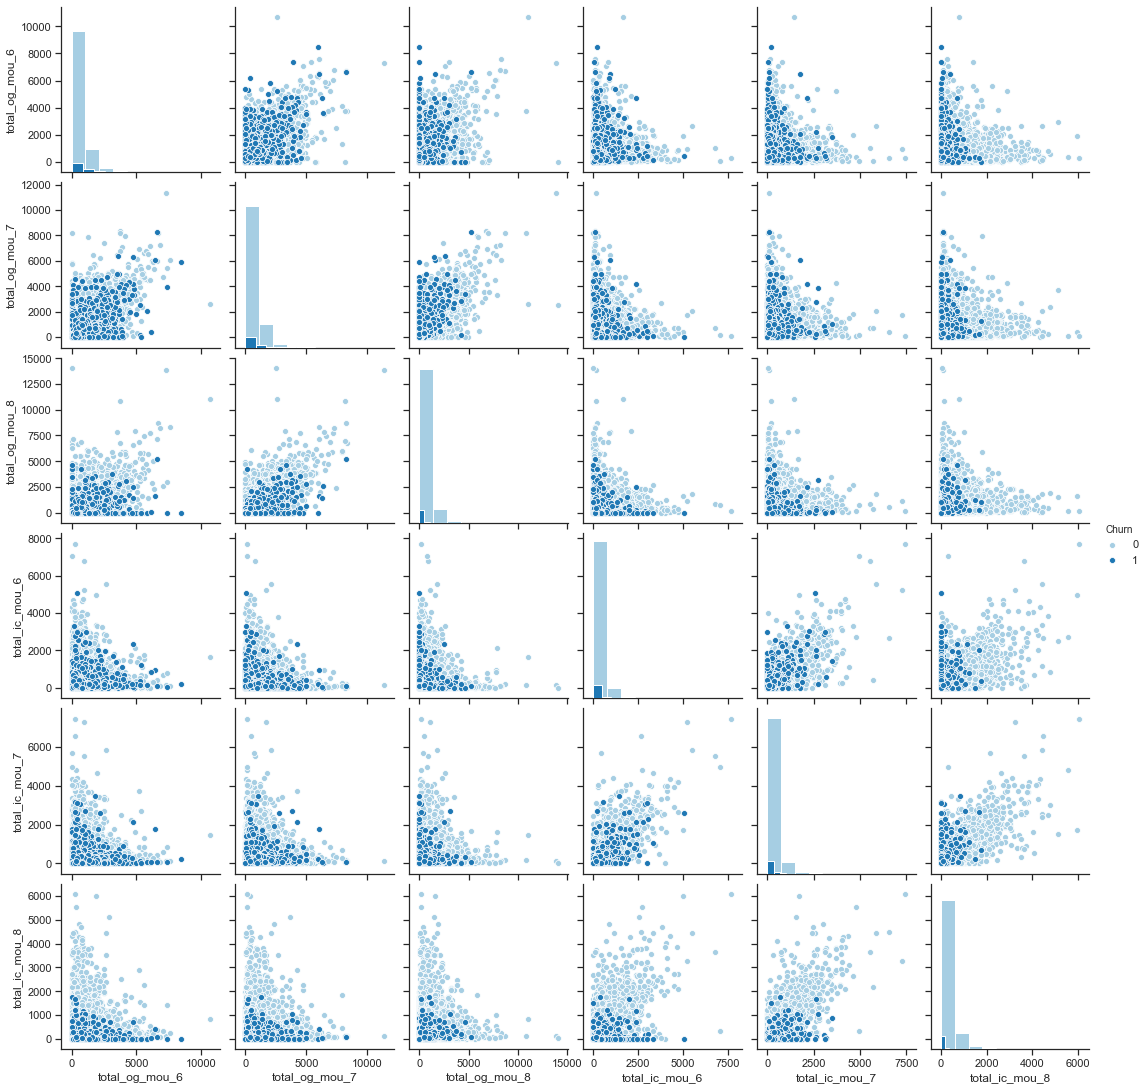

In [38]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df_churn[['total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8','Churn']],hue='Churn',palette='Paired',diag_kind='hist')
plt.show()

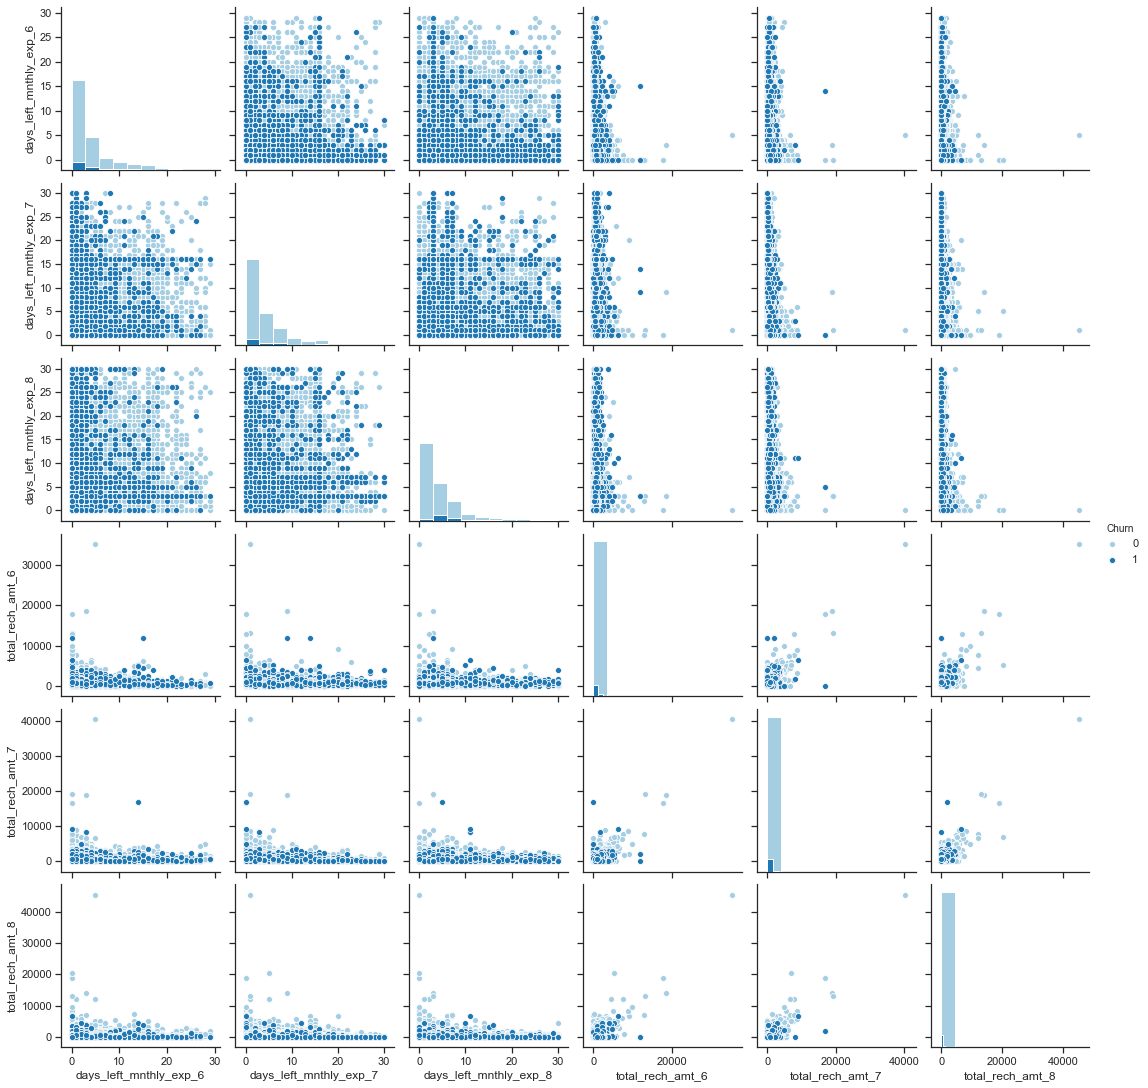

In [39]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df_churn[['days_left_mnthly_exp_6', 'days_left_mnthly_exp_7', 'days_left_mnthly_exp_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','Churn']],hue='Churn',palette='Paired',diag_kind='hist')
plt.show()

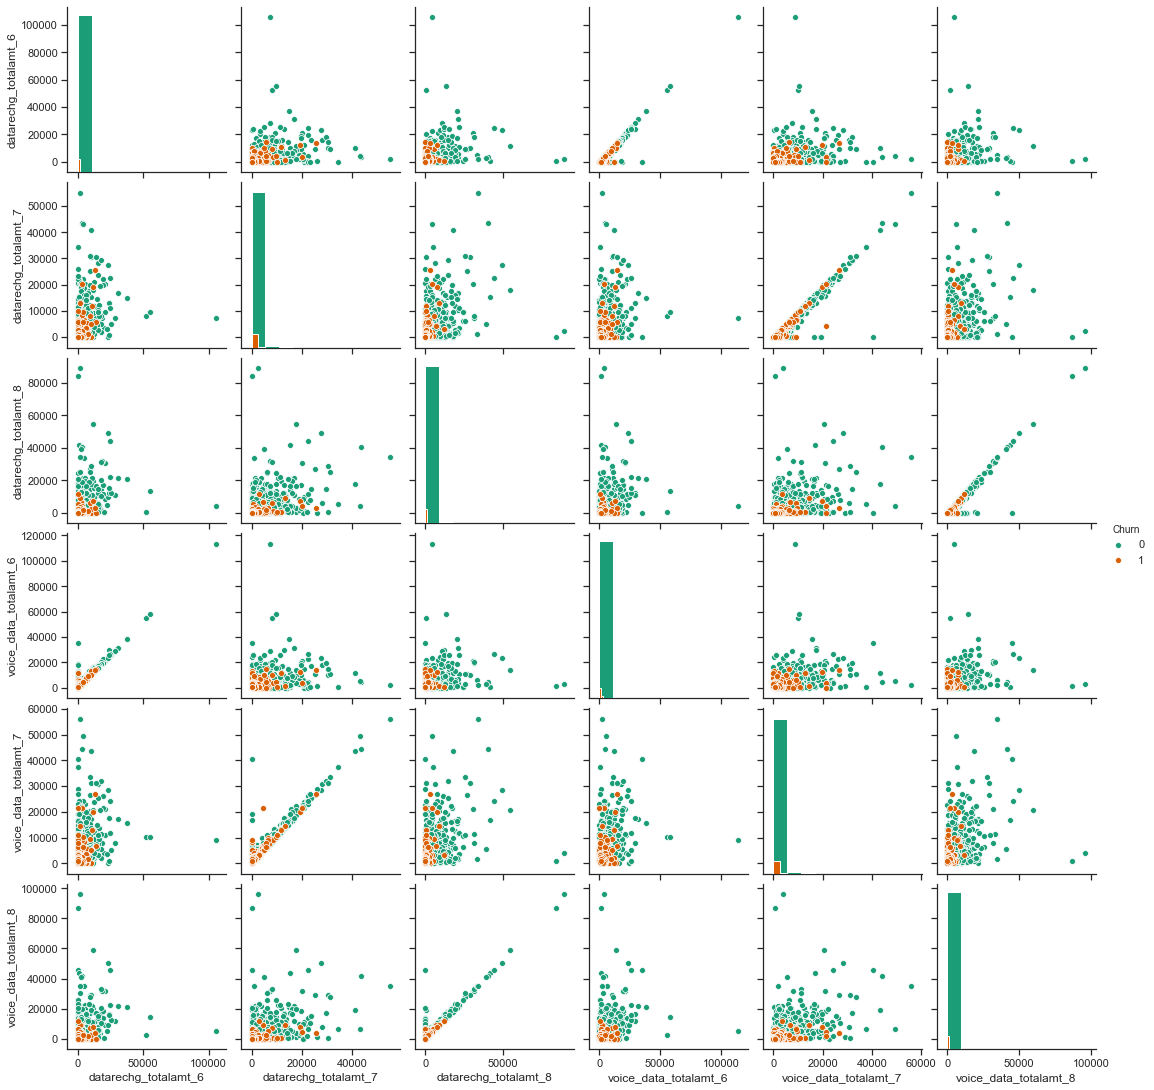

In [40]:
#Understanding correlation
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df_churn[['datarechg_totalamt_6', 'datarechg_totalamt_7', 'datarechg_totalamt_8',
                          'voice_data_totalamt_6','voice_data_totalamt_7','voice_data_totalamt_8','Churn']],hue='Churn',palette='Dark2',diag_kind='hist')
plt.show()

#### . voice_data_ rechg_totalamt and datarechg_total_amt show a positive correlation with each other

## <font color='blue'>ANALYSIS PART 5: Train Test Split and Feature Scaling</font>

In [41]:
from sklearn.preprocessing import MinMaxScaler

#Instantiate an object
scaler=MinMaxScaler()
df_churn=pd.DataFrame(scaler.fit_transform(df_churn),columns=df_churn.columns)
df_churn.head(10)

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,days_left_mnthly_exp_6,days_left_mnthly_exp_7,days_left_mnthly_exp_8,AON_1-2yr,AON_2-3yr,AON_3-4yr,AON_4-6yr,AON_6-8yr,AON_>8yr,total_allntwrk_calltime_6,total_allntwrk_calltime_7,total_allntwrk_calltime_8,total_loc_og_calltime_6,total_loc_og_calltime_7,total_loc_og_calltime_8,total_nonlocal_og_calltime_6,total_nonlocal_og_calltime_7,total_nonlocal_og_calltime_8,total_loc_ic_calltime_6,total_loc_ic_calltime_7,total_loc_ic_calltime_8,total_nonlocal_ic_calltime_6,total_nonlocal_ic_calltime_7,total_nonlocal_ic_calltime_8,total_datausage_6,total_datausage_7,total_datausage_8,2gservschemes_count_6,2gservschemes_count_7,2gservschemes_count_8,3gservschemes_count_6,3gservschemes_count_7,3gservschemes_count_8,datarechg_totalamt_6,datarechg_totalamt_7,datarechg_totalamt_8,voice_data_totalamt_6,voice_data_totalamt_7,voice_data_totalamt_8
0,0.081898,0.059980,0.033622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000897,0.013029,0.021739,0.010204,0.010287,0.006248,0.005560,0.062843,0.062843,0.056642,0.062843,0.062843,0.056642,0.016393,0.018519,0.016667,0.162058,0.162058,0.162058,0.033395,0.057732,0.062054,0.002354,0.000000,0.009063,0.001367,1.0,0.310345,0.500000,0.766667,0.0,1.0,0.0,0.0,0.0,0.0,0.042831,0.040586,0.000000,0.012240,0.017424,0.000000,0.009178,0.006491,0.000000,0.018596,0.021925,0.001010,0.003452,0.002787,0.000000,0.002486,0.005356,0.003841,0.000000,0.000000,0.000000,0.034483,0.028571,0.022222,0.002385,0.004575,0.002828,0.005412,0.008988,0.005256
1,0.110967,0.090525,0.119378,0.045674,0.053605,0.024935,0.081188,0.074977,0.070672,0.016287,0.036232,0.035714,0.044899,0.019586,0.080274,0.394015,0.197007,0.355136,0.000000,0.000000,0.175096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004470,0.002114,0.001678,0.000000,1.0,0.103448,0.200000,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.047902,0.054740,0.026931,0.039660,0.069566,0.023169,0.008889,0.007349,0.007519,0.057397,0.054930,0.034894,0.036202,0.030274,0.039133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013926,0.014088,0.037941
2,0.087944,0.067446,0.031406,0.047626,0.037980,0.012217,0.013460,0.003828,0.002726,0.061889,0.152174,0.071429,0.012418,0.014900,0.002648,0.022444,0.038404,0.006743,0.012469,0.000000,0.002248,0.000000,0.037037,0.050000,0.000000,0.099035,0.014791,0.000000,0.040550,0.016991,0.001628,0.099355,0.010940,0.000000,0.0,0.172414,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.047628,0.037998,0.012217,0.035520,0.037548,0.006033,0.015442,0.012934,0.007395,0.010923,0.003684,0.002930,0.004108,0.000689,0.000126,0.000000,0.038983,0.000399,0.000000,0.041667,0.068182,0.000000,0.000000,0.000000,0.000000,0.006427,0.002323,0.003852,0.017031,0.003410
3,0.092470,0.070285,0.045915,0.080601,0.090520,0.076090,0.026839,0.017720,0.043029,0.071661,0.188406,0.137755,0.017050,0.016859,0.015843,0.012469,0.012469,0.011238,0.007481,0.004988,0.011238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.080607,0.090563,0.076090,0.009117,0.012260,0.011751,0.090491,0.084258,0.067148,0.016812,0.013557,0.029525,0.014974,0.006539,0.017110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005288,0.012127,0.007488
4,0.077795,0.059417,0.038063,0.012589,0.012322,0.017053,0.015497,0.029947,0.049176,0.009772,0.036232,0.0

In [42]:
df_churn.describe()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,days_left_mnthly_exp_6,days_left_mnthly_exp_7,days_left_mnthly_exp_8,AON_1-2yr,AON_2-3yr,AON_3-4yr,AON_4-6yr,AON_6-8yr,AON_>8yr,total_allntwrk_calltime_6,total_allntwrk_calltime_7,total_allntwrk_calltime_8,total_loc_og_calltime_6,total_loc_og_calltime_7,total_loc_og_calltime_8,total_nonlocal_og_calltime_6,total_nonlocal_og_calltime_7,total_nonlocal_og_calltime_8,total_loc_ic_calltime_6,total_loc_ic_calltime_7,total_loc_ic_calltime_8,total_nonlocal_ic_calltime_6,total_nonlocal_ic_calltime_7,total_nonlocal_ic_calltime_8,total_datausage_6,total_datausage_7,total_datausage_8,2gservschemes_count_6,2gservschemes_count_7,2gservschemes_count_8,3gservschemes_count_6,3gservschemes_count_7,3gservschemes_count_8,datarechg_totalamt_6,datarechg_totalamt_7,datarechg_totalamt_8,voice_data_totalamt_6,voice_data_totalamt_7,voice_data_totalamt_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.093939,0.069291,0.042170,0.057136,0.055288,0.039285,0.037577,0.039871,0.046141,0.038603,0.084919,0.050882,0.018776,0.016375,0.012894,0.042216,0.042943,0.035996,0.025160,0.025026,0.020767,0.027340,0.034330,0.027032,0.050212,0.051345,0.046619,0.017314,0.032023,0.030074,0.013095,0.019516,0.014197,0.003066,0.081364,0.121847,0.124158,0.142899,0.266091,0.154495,0.099963,0.102130,0.118729,0.082364,0.060224,0.057586,0.041588,0.024166,0.033675,0.021861,0.043408,0.034253,0.023141,0.031345,0.036624,0.042430,0.011207,0.009230,0.009638,0.010294,0.017443,0.015229,0.029537,0.029110,0.027466,0.014729,0.013043,0.009187,0.004314,0.009590,0.005199,0.009841,0.021199,0.010926
std,0.015360,0.012911,0.014554,0.064725,0.063106,0.049881,0.047371,0.050216,0.059535,0.030714,0.068351,0.047318,0.015943,0.014440,0.013487,0.043720,0.045235,0.038932,0.035845,0.035144,0.032633,0.046414,0.057256,0.049934,0.072496,0.073488,0.071105,0.026548,0.047379,0.048162,0.032593,0.048392,0.037321,0.020003,0.273398,0.160956,0.152718,0.174084,0.441920,0.361428,0.299956,0.302824,0.323475,0.274923,0.064742,0.063061,0.049791,0.035441,0.048764,0.032710,0.072535,0.057969,0.043851,0.042056,0.048660,0.056703,0.027744,0.024005,0.025400,0.021157,0.034046,0.032219,0.059575,0.056798,0.057666,0.040270,0.036658,0.028367,0.013429,0.026798,0.018212,0.013803,0.029107,0.018821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

<Figure size 1440x1440 with 0 Axes>

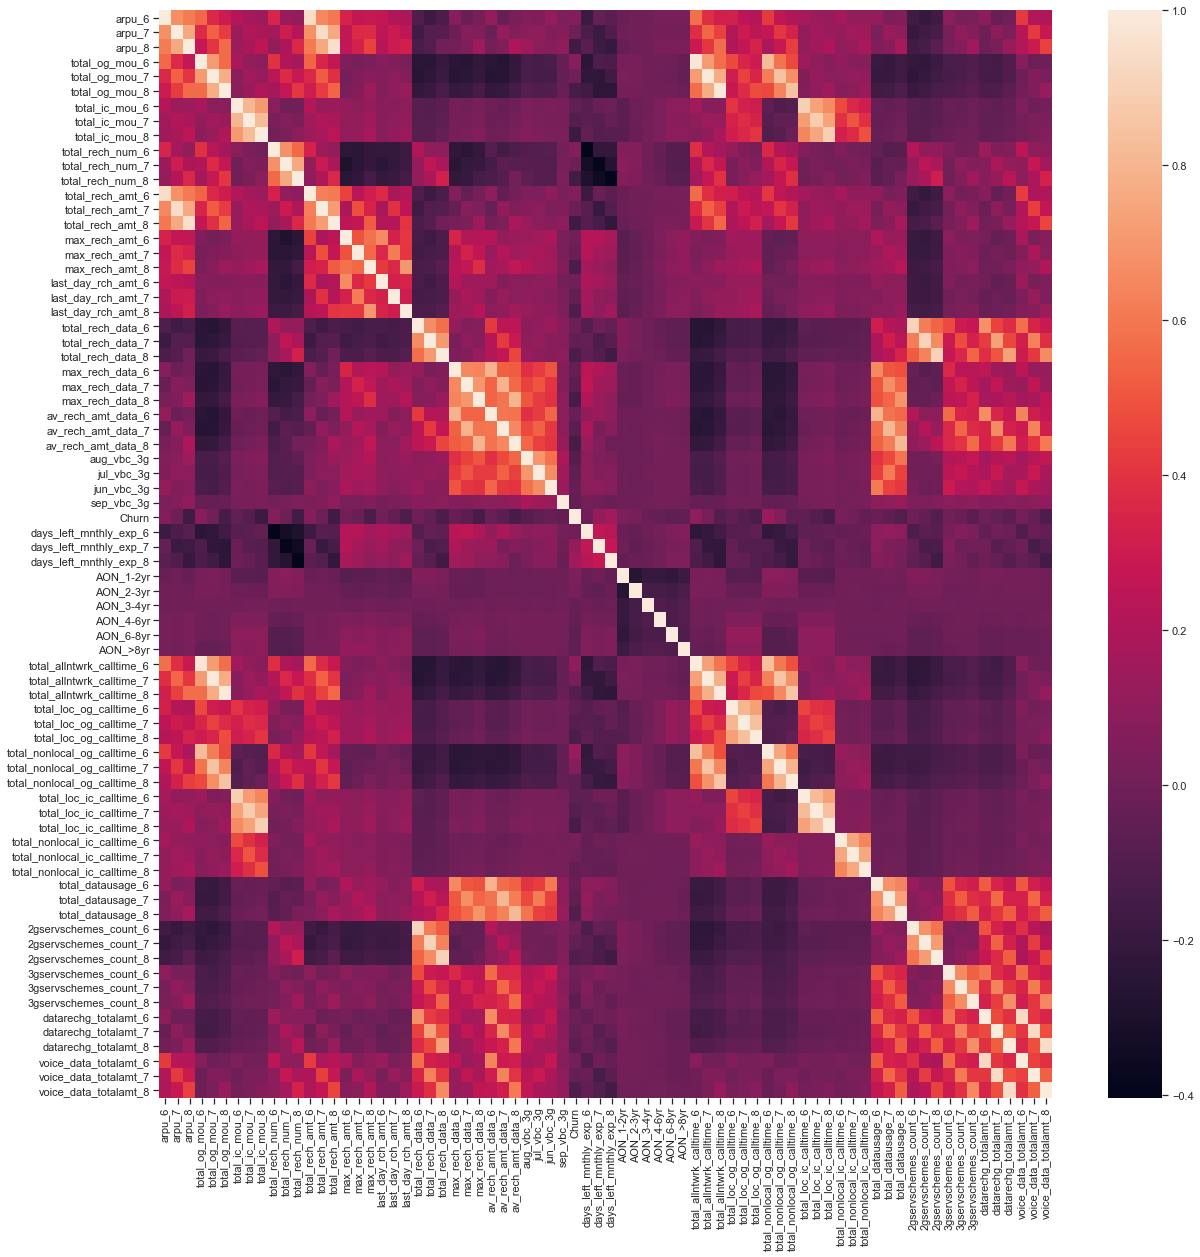

In [43]:
# Visualizing correlation after scaling
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df_churn.corr())

In [44]:
# Creating a backup copy of the churned dataset
df_model=df_churn.copy()

### <font color='blue'>__5.1—Train-Test Split__</font>

In [45]:
# divide data into train and test
from sklearn.model_selection import train_test_split

X = df_model.drop("Churn", axis = 1)
y = df_model.Churn

# Train data & Test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)

In [46]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(21000, 73)

(21000,)

(9001, 73)

(9001,)

### <font color='blue'>__5.2—Treating Data Imbalance using SMOTE__</font>

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import manifold, datasets, decomposition, discriminant_analysis
#from sklearn.externals import joblib
import joblib as jb

In [48]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train, y_train=sm.fit_sample(X_train, y_train)

### <font color='blue'>__5.3—Using PCA for dimensionality reduction on the train dataset__</font>

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
df_train_pca = pca.fit_transform(X_train)
#pca = PCA(random_state=42)
#pca.fit(X_train)

In [65]:
pca.components_

array([[-1.76892514e-04,  1.82227772e-05, -1.01010618e-03,
         5.51000145e-03,  7.15325500e-03, -5.85352244e-05,
        -7.54733943e-03, -6.17996868e-03, -8.91313647e-03,
         2.86707220e-03,  8.66142969e-03,  2.33869244e-03,
        -2.14440048e-04, -5.71337147e-05, -8.89065273e-04,
        -3.78892618e-03, -3.08579794e-03, -4.03579347e-03,
        -1.80448803e-03, -2.43682728e-03, -4.32340983e-03,
         3.45102257e-03,  3.25682038e-03,  7.75430128e-04,
        -5.37067220e-04, -1.73655135e-03, -2.21172135e-03,
         4.28241005e-04, -5.91820644e-04, -9.52130977e-04,
        -8.73957621e-04, -3.54194906e-04, -9.32428910e-04,
        -4.21326899e-04,  6.35912119e-04,  1.92711423e-03,
        -1.18536246e-02,  9.05870595e-01, -3.77965996e-01,
        -1.08001276e-01, -9.96081141e-02, -1.01827234e-01,
        -5.73075868e-02,  5.82003545e-03,  7.22610449e-03,
         1.29412924e-04, -5.16443841e-03, -6.40692664e-03,
        -4.14643284e-03,  1.35356148e-02,  1.17017007e-0

#### __Approximate % of cumulative variance as explained by each component__

In [73]:
print (pca.explained_variance_ratio_.cumsum())

[0.28210442 0.44464585 0.55158346 0.65486705 0.73168569 0.78799187
 0.82843931 0.86271639 0.89175904 0.91541862 0.93141854 0.94291992
 0.95290367]


In [68]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head()

,PC1,PC2,PC3,Feature
0,-0.000177,0.000138,0.000091,arpu_6
1,0.000018,0.000792,-0.000275,arpu_7
2,-0.001010,-0.001612,-0.001793,arpu_8
3,0.005510,0.014849,0.012398,total_og_mou_6
4,0.007153,0.013626,0.007485,total_og_mou_7


#### __Variance ratio bar graph to visualize cumulative variance as explained by each component__

<BarContainer object of 13 artists>

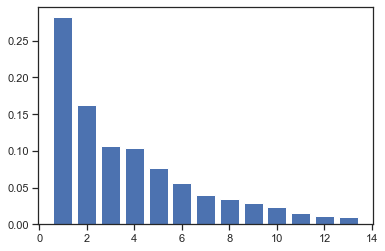

In [69]:
import matplotlib.pyplot as plt
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [84]:
#Cumulative variance expalined
var_cumu=np.cumsum(pca.explained_variance_ratio_)

#### __Scree plot__

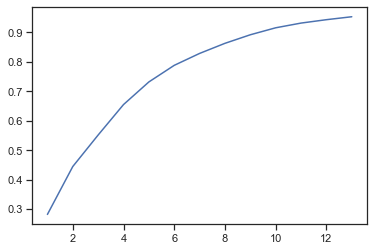

In [75]:
#Scree plot
plt.plot(range(1,len(var_cumu)+1),var_cumu)

__The scree plot and the variance ratio bar graph confirms that at 4-5 components explain ~95% of the cumulative variance__

<Figure size 1080x720 with 0 Axes>

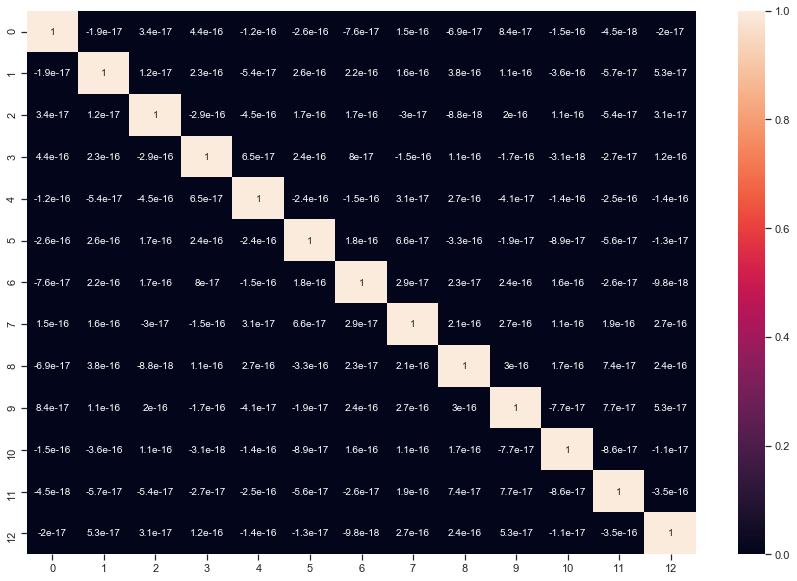

In [83]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(corrmat,annot = True)

#### **The correlation is very close to 0**

#Applying selected components to the test data
df_test_pca = pca.transform(X_test)
df_test_pca.shape

## <font color='blue'>ANALYSIS PART 6: Predictive modeling using Logistic Regression</font>

In [85]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

In [86]:
# Pediction on train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]

In [87]:
# Converting y_test to dataframe
y_train_final = pd.DataFrame(y_train)
y_train_final.reset_index(inplace=True)
y_train_final.rename(columns = {'index':'mobile_number'}, inplace = True)
y_train_final['train_churn_prob'] = pred_probs_train
y_train_final.head()

,mobile_number,Churn,train_churn_prob
0,0,0.0,0.369565
1,1,0.0,0.100404
2,2,0.0,0.400807
3,3,0.0,0.052455
4,4,0.0,0.136498


In [88]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_final['predicted'] = y_train_final.train_churn_prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_final.head()

,mobile_number,Churn,train_churn_prob,predicted
0,0,0.0,0.369565,0
1,1,0.0,0.100404,0
2,2,0.0,0.400807,0
3,3,0.0,0.052455,0
4,4,0.0,0.136498,0


### <font color='blue'>6.1— Model Accuracy Metrics</font>

In [89]:
from sklearn.metrics import precision_recall_curve

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 38613    1.0
 38614    1.0
 38615    1.0
 38616    1.0
 38617    1.0
 Name: Churn, Length: 38618, dtype: float64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38613    1
 38614    1
 38615    1
 38616    1
 38617    1
 Name: predicted, Length: 38618, dtype: int64)

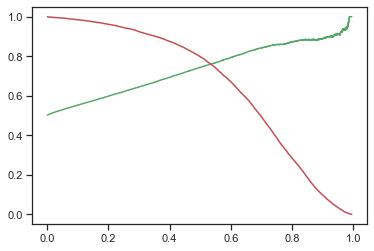

In [92]:
y_train_final.Churn, y_train_final.predicted
p, r, thresholds = precision_recall_curve(y_train_final.Churn, y_train_final.train_churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### __The cutoff threshold is ~0.5__

### <font color='blue'>6.2— Making Predictions on Test Set</font>

In [93]:
df_test_pca = pca.transform(X_test)
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [94]:
# Converting y_test to dataframe
y_test_final = pd.DataFrame(y_test)
y_test_final.reset_index(inplace=True)
y_test_final.rename(columns = {'index':'mobile_number'}, inplace = True)
y_test_final['test_churn_prob'] = pred_probs_test
y_test_final.head()

,mobile_number,Churn,test_churn_prob
0,6102,1.0,0.931439
1,2539,1.0,0.547529
2,21576,0.0,0.184312
3,19574,0.0,0.289119
4,12804,1.0,0.340388


In [95]:
# Creating new column 'predicted' for test prob
y_test_final['predicted'] = y_test_final.test_churn_prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_final.head()

,mobile_number,Churn,test_churn_prob,predicted
0,6102,1.0,0.931439,1
1,2539,1.0,0.547529,1
2,21576,0.0,0.184312,0
3,19574,0.0,0.289119,0
4,12804,1.0,0.340388,0


### <font color='blue'>6.3— Model Evaluation</font>

In [97]:
from sklearn import metrics

# Checking the overall accuracy.
metrics.accuracy_score(y_test_final.Churn, y_test_final.predicted)

0.7310298855682702

#### __Precision Vs Recall__

In [100]:
from sklearn.metrics import precision_score, recall_score

In [101]:
# Precision
precision_score(y_test_final.Churn, y_test_final.predicted)

0.19956850053937433

In [102]:
# Recall= Rate of sensitivity of the logistic regression model
recall_score(y_test_final.Churn, y_test_final.predicted)

0.74

#### The sensitivity rate explains that of all the actual churns, @74%  are accurately predicted

#### __ROC Curve__

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate or [1 - True Negative Rate]')

Text(0, 0.5, 'True Positive Rate')

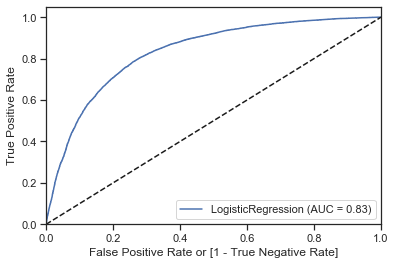

In [108]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_pca, df_train_pca, y_train, drop_intermediate=False)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

__The ROC curve covers 83% of the plot area. This % strengthens model accuracy__

## <font color='blue'>ANALYSIS PART 7: Classification Model</font>

### <font color='blue'>7.1— Random Forest Classification</font>

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_depth=5,n_jobs=-1)

In [146]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  7.2min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [140]:
grid_search.best_score_

0.94992012873813

In [141]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

#### <font color='blue'>7.1.2—Accuracy measure of the train & test datasets explained by Random Forest</font>

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [152]:
print(accuracy_score(y_train,y_train_final.predicted)) # Prediction of the train set
confusion_matrix(y_train,y_train_final.predicted)

0.7619244911699208


array([[14019,  5290],
       [ 3904, 15405]], dtype=int64)

In [153]:
print(accuracy_score(y_test,y_test_final.predicted)) # Prediction of the test set
confusion_matrix(y_test,y_test_final.predicted)

0.7310298855682702


array([[6025, 2226],
       [ 195,  555]], dtype=int64)

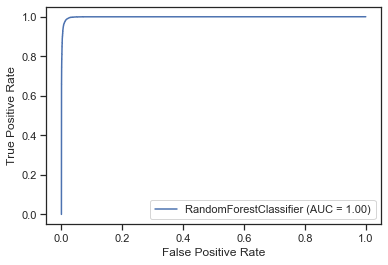

In [132]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

#### <font color='Blue'>7.1.3—Accuracy measure visualization of the test dataset</font>

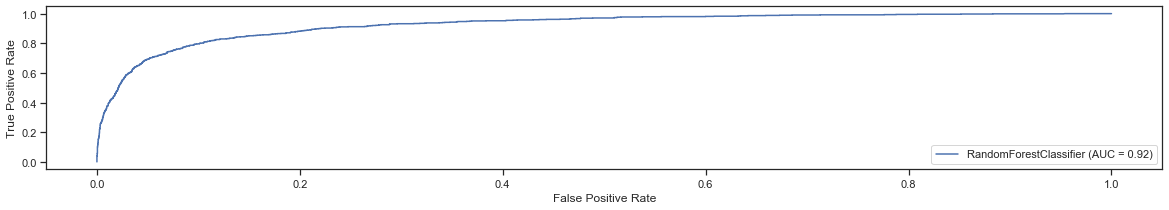

In [142]:
plot_roc_curve(rf_best, X_test, y_test)
plt.show()

In [154]:
imp_RF_features = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": rf_best.feature_importances_
})

imp_RF_features.sort_values(by="Importance", ascending=False).head()

,Variable,Importance
36,days_left_mnthly_exp_8,0.077407
8,total_ic_mou_8,0.071724
72,voice_data_totalamt_8,0.066942
20,last_day_rch_amt_8,0.054451
54,total_loc_ic_calltime_8,0.048610


### <font color='blue'>7.2— Decision Tree Classification</font>

In [172]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
#from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#### <font color='Blue'>7.2.1—Hyperparameter Tuning for the Decision Tree</font>

In [173]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42, max_depth=2)

In [157]:
# Defining parameters for hyper-parameter tuning
params = {
    "max_depth": [3,5,10,15,20],
    "min_samples_leaf": [50,100,150,200]
}

In [158]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [159]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.9s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_leaf': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [160]:
# Checking the accuracy of the best model
grid_search.best_score_

0.8050132084360189

In [161]:
# Selecting the best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, random_state=42)

#### <font color='blue'>7.2.2—Accuracy measure of the train dataset explained by Decision Tree</font>

In [164]:
# Predictions using best model on train data
y_train_pred = dt_best.predict(df_train_pca)

from sklearn.metrics import classification_report
# Classification report for train data set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84     19309
         1.0       0.83      0.86      0.85     19309

    accuracy                           0.84     38618
   macro avg       0.84      0.84      0.84     38618
weighted avg       0.84      0.84      0.84     38618



#### <font color='Blue'>7.2.3—Accuracy measure visualization of the train dataset</font>

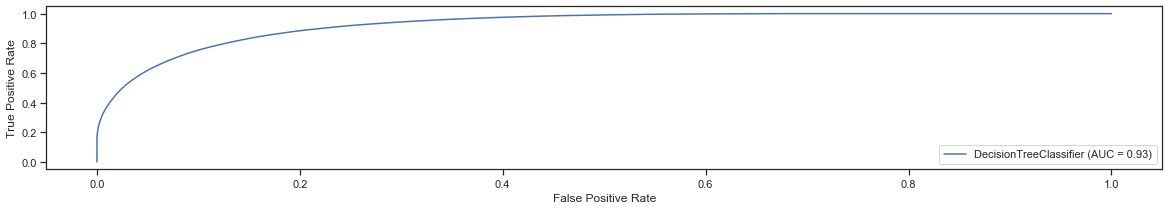

In [165]:
plot_roc_curve(dt_best, df_train_pca, y_train)
plt.show()

#### <font color='blue'>7.2.4—Accuracy measure of the test datasets explained by Decision Tree</font>

In [167]:
# Predictions on test data set using best model
y_test_pred = dt_best.predict(df_test_pca)

# Precision
precision_score(y_test, y_test_pred)

0.23255813953488372

In [168]:
# Recall
recall_score(y_test, y_test_pred)

0.6533333333333333

In [169]:
# Classification report for test data set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.80      0.88      8251
         1.0       0.23      0.65      0.34       750

    accuracy                           0.79      9001
   macro avg       0.60      0.73      0.61      9001
weighted avg       0.90      0.79      0.83      9001



#### <font color='Blue'>7.2.5—Accuracy measure visualization of the test dataset</font>

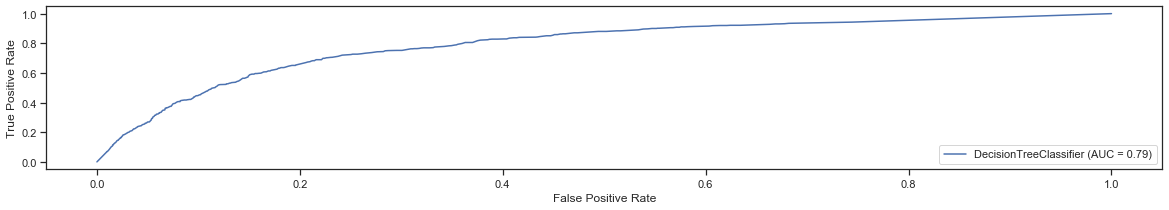

In [170]:
# ROC curve for test data
plot_roc_curve(dt_best, df_test_pca, y_test)
plt.show()

### <font color='blue'>7.3— XGBoost model classification</font>

In [216]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [187]:
xg_model = XGBClassifier()

In [202]:
xgb_model1=xg_model.fit(df_train_pca, y_train)

#### <font color='Blue'>7.3.1—Accuracy measure visualization of the train dataset</font>

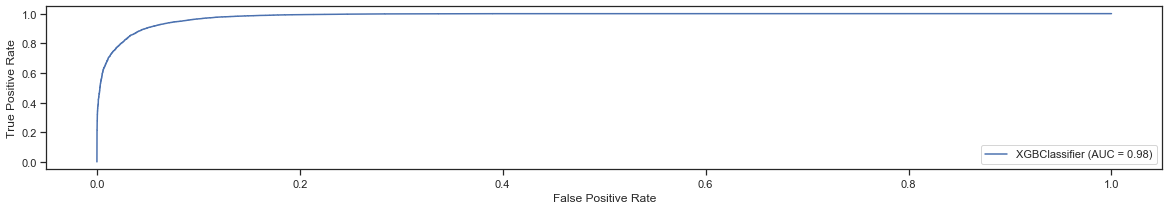

In [204]:
plot_roc_curve(xg_model, df_train_pca, y_train)
plt.show()

In [221]:
# Search for best hyperparameters
#cv = StratifiedKFold(y_train, n_splits=10, shuffle=True, random_state=111)
cv = StratifiedKFold().split(X_train,y_train)

parameters = {'learning_rate': [0.1],
              'max_depth': [5, 6, 8, 10],
              'min_child_weight': [1, 3, 5, 7, 10],
              'n_estimators': [75, 100, 125, 150]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xg_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [205]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 150}
0.9621145311144984
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [206]:
# Building final model with the tuned parameters
final_model = xgb.XGBClassifier(learning_rate=0.1,
                                max_depth=10,
                                min_child_weight=1,
                                n_estimators=150)

final_model.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### <font color='Blue'>7.3.2—Accuracy measure visualization of the train dataset</font>

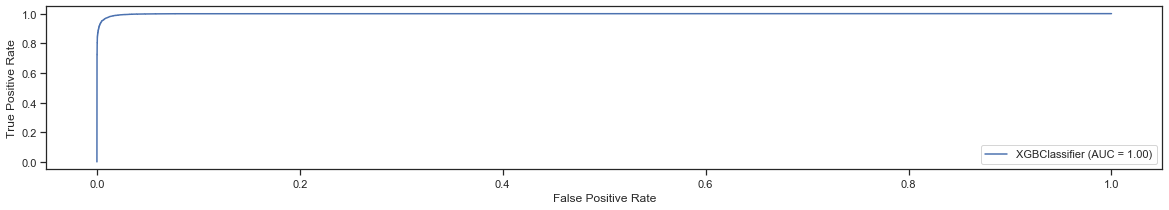

In [207]:
# Plotting ROC curve for test data
plot_roc_curve(final_model, df_train_pca, y_train)
plt.show()

#### <font color='Blue'>7.3.3—Accuracy measure visualization of the train dataset</font>

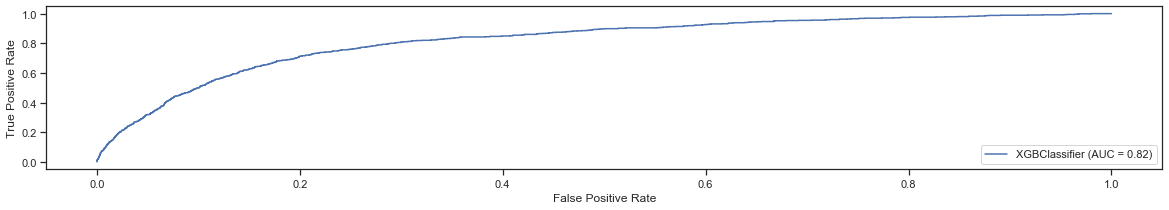

In [208]:
# Plotting ROC curve for test data
plot_roc_curve(final_model, df_test_pca, y_test)
plt.show()

## <font color='blue'>ANALYSIS PART 8: Model Predictions & Observations</font>

- The scree plot and the variance ratio bar graph confirms that at 4-5 PCA components explain ~95% of the cumulative variance
- The model accuracy for the Logistic Regression prediction is @74%. This infers that the model is able to accurately  
  predict 74% churn customers of the total population of customers who actually churned  
- The classification models used for the analysis are:  
    - Random Forest  
    - Decision Tree  
    - XGBoost  
- Model accuracy results are best for XGBoost with a test dataset accuracy @82%.
- It is observed that churn prediction of customers is most suitable explained by their behavior during the last month. In  
  the case of this analysis, customer's behavioral paatern in the 8th month specifically in the fields of  
  usage of calltime, amount spent on voice services usage, and the amount spent to recharge are strong predictors.
  
- Below are the 5 important variable:
     - days_left_mnthly_exp_8
     - total_ic_mou_8
     - voice_data_totalamt_8
     - last_day_rch_amt_8
     - total_loc_ic_calltime_8

## <font color='Blue'>__COMPLETION OF ANALYSIS__</font>